In [1]:
from numpy import concatenate
from pandas import concat
from pandas import DataFrame
from pandas import read_csv


# Pustaka untuk visualisasi data
from matplotlib import pyplot
from matplotlib import pyplot as plt
# Pustaka untuk membuat data latih dan data uji.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Pustaka untuk membuat model prediksi LSTM-RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Pustaka untuk  evaluasi model prediksi
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
dataset = read_csv("hotspot_riau_fix.csv",index_col=0, engine='python')
dataset

,'Jumlah Hotspot',Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,,
1/1/2013,0,23.0,33.5,27.8,79.0,0.000000,1.8,4.0,270.0,3.0,0
2/1/2013,0,23.0,31.6,26.8,82.0,39.400000,1.7,3.0,50.0,3.0,1
3/1/2013,30,24.0,35.0,28.6,73.0,0.000000,6.7,5.0,320.0,3.0,1
4/1/2013,2,24.0,33.2,27.9,78.0,8.482221,4.6,5.0,300.0,3.0,1
5/1/2013,7,21.0,33.0,28.4,73.0,0.000000,3.6,5.0,320.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
27-12-2020,2,23.2,32.2,26.7,79.0,8.482221,2.0,3.0,60.0,1.0,9
28-12-2020,2,23.0,29.5,25.4,88.0,1.800000,5.1,3.0,330.0,1.0,9
29-12-2020,0,23.4,30.2,25.9,86.0,0.000000,0.3,3.0,350.0,0.0,9


In [4]:
# summarize first 5 rows
print(dataset.head(5))

          'Jumlah Hotspot'    Tn    Tx  Tavg  RH_avg         RR   ss  ff_x  \
Tanggal                                                                      
1/1/2013                 0  23.0  33.5  27.8    79.0   0.000000  1.8   4.0   
2/1/2013                 0  23.0  31.6  26.8    82.0  39.400000  1.7   3.0   
3/1/2013                30  24.0  35.0  28.6    73.0   0.000000  6.7   5.0   
4/1/2013                 2  24.0  33.2  27.9    78.0   8.482221  4.6   5.0   
5/1/2013                 7  21.0  33.0  28.4    73.0   0.000000  3.6   5.0   

          ddd_x  ff_avg  ddd_car  
Tanggal                           
1/1/2013  270.0     3.0        0  
2/1/2013   50.0     3.0        1  
3/1/2013  320.0     3.0        1  
4/1/2013  300.0     3.0        1  
5/1/2013  320.0     3.0        0  


In [5]:
import seaborn as sns
dataset_corr=dataset.corr()
dataset_corr

,'Jumlah Hotspot',Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
'Jumlah Hotspot',1.000000,-0.027825,0.114302,0.114274,-0.278631,-0.085643,0.039978,-0.015138,-0.041352,0.062456,-0.086820
Tn,-0.027825,1.000000,0.191216,0.438545,-0.068512,-0.244285,0.130975,0.027941,-0.032754,-0.029193,0.050096
Tx,0.114302,0.191216,1.000000,0.702377,-0.543178,-0.214857,0.288695,0.131991,0.094539,0.035089,0.032376
Tavg,0.114274,0.438545,0.702377,1.000000,-0.697398,-0.304063,0.277699,0.046536,0.059644,0.056580,0.027159
RH_avg,-0.278631,-0.068512,-0.543178,-0.697398,1.000000,0.275592,-0.201619,-0.026668,-0.072861,-0.289066,-0.053153
RR,-0.085643,-0.244285,-0.214857,-0.304063,0.275592,1.000000,-0.071854,-0.044138,0.050142,-0.068364,-0.074047
ss,0.039978,0.130975,0.288695,0.277699,-0.201619,-0.071854,1.000000,0.089116,0.034721,-0.015742,0.040869
ff_x,-0.015138,0.027941,0.131991,0.046536,-0.026668,-0.044138,0.089116,1.000000,0.191351,0.322402,0.069685
ddd_x,-0.041352,-0.032754,0.094539,0.059644,-0.072861,0.050142,0.034721,0.191351,1.000000,0.196103,-0.098005
ff_avg,0.062456,-0.029193,0.035089,0.056580,-0.289066,-0.068364,-0.015742,0.322402,0.196103,1.000000,0.096850


<AxesSubplot:>

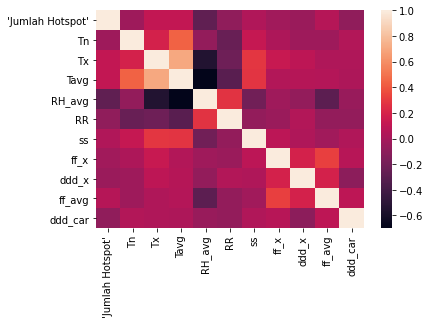

In [6]:
sns.heatmap(dataset_corr)

In [7]:
values = dataset.values
dataset.head()

,'Jumlah Hotspot',Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,,
1/1/2013,0,23.0,33.5,27.8,79.0,0.000000,1.8,4.0,270.0,3.0,0
2/1/2013,0,23.0,31.6,26.8,82.0,39.400000,1.7,3.0,50.0,3.0,1
3/1/2013,30,24.0,35.0,28.6,73.0,0.000000,6.7,5.0,320.0,3.0,1
4/1/2013,2,24.0,33.2,27.9,78.0,8.482221,4.6,5.0,300.0,3.0,1
5/1/2013,7,21.0,33.0,28.4,73.0,0.000000,3.6,5.0,320.0,3.0,0


In [8]:
# specify columns to plot
groups = [0,1,2,3,4,5,6,7]
i = 1

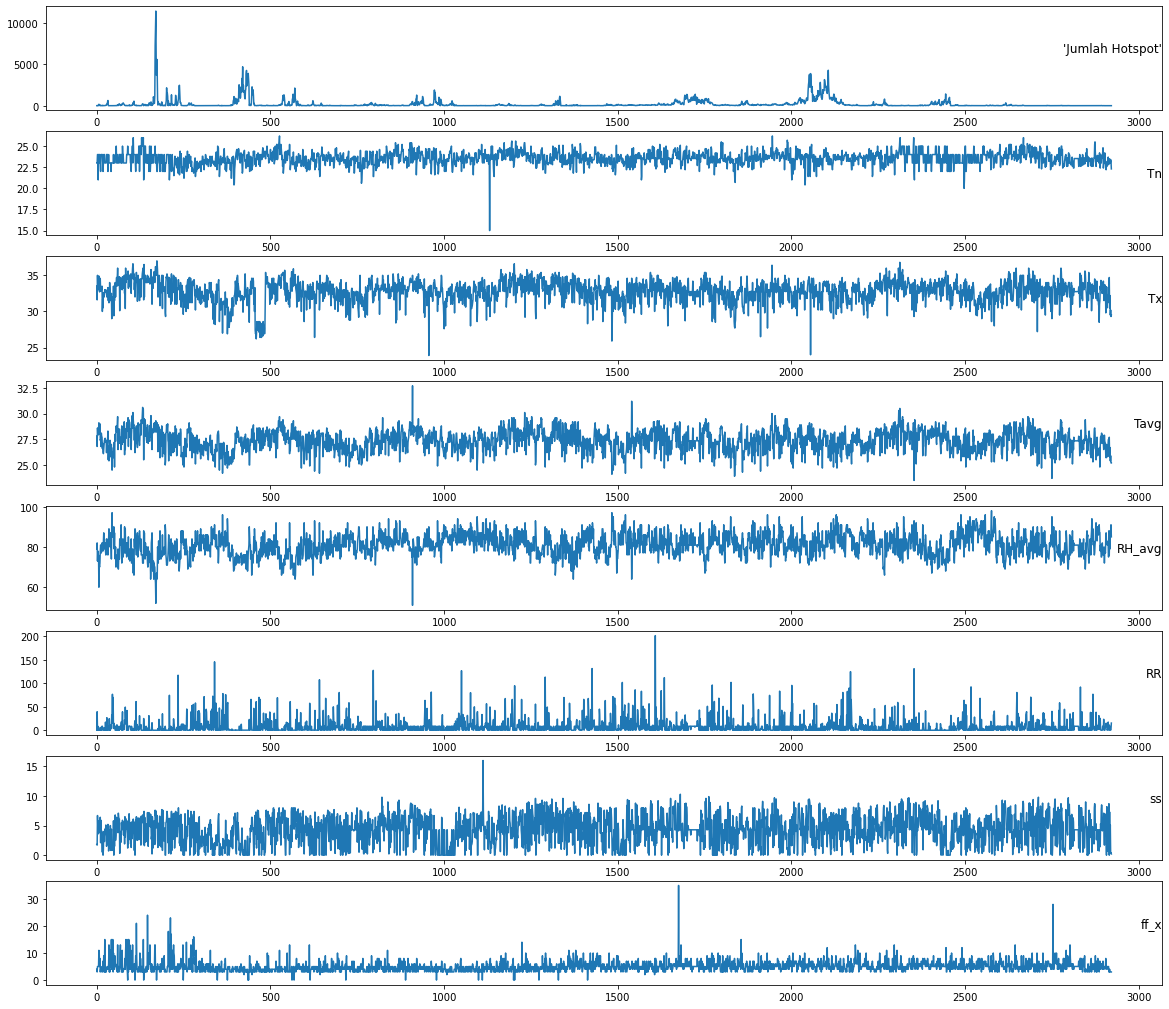

In [9]:
# plot each column
pyplot.figure(figsize=(20, 18))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [10]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    # return value
    return agg

In [11]:
values = dataset.values

In [12]:
dataset.head()

,'Jumlah Hotspot',Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,,
1/1/2013,0,23.0,33.5,27.8,79.0,0.000000,1.8,4.0,270.0,3.0,0
2/1/2013,0,23.0,31.6,26.8,82.0,39.400000,1.7,3.0,50.0,3.0,1
3/1/2013,30,24.0,35.0,28.6,73.0,0.000000,6.7,5.0,320.0,3.0,1
4/1/2013,2,24.0,33.2,27.9,78.0,8.482221,4.6,5.0,300.0,3.0,1
5/1/2013,7,21.0,33.0,28.4,73.0,0.000000,3.6,5.0,320.0,3.0,0


In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 1/1/2013 to 31-12-2020
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   'Jumlah Hotspot'  2922 non-null   int64  
 1   Tn                2922 non-null   float64
 2   Tx                2922 non-null   float64
 3   Tavg              2922 non-null   float64
 4   RH_avg            2922 non-null   float64
 5   RR                2922 non-null   float64
 6   ss                2922 non-null   float64
 7   ff_x              2922 non-null   float64
 8   ddd_x             2922 non-null   float64
 9   ff_avg            2922 non-null   float64
 10  ddd_car           2922 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 273.9+ KB
None


In [14]:
# ensure all data is float
values = values.astype('float32')

In [15]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [16]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [17]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
1,0.000000,0.714286,0.732824,0.467391,0.595745,0.000000,0.11250,0.114286,0.750000,0.500000,...,0.714286,0.587786,0.358696,0.659574,0.195533,0.10625,0.085714,0.138889,0.500000,0.111111
2,0.000000,0.714286,0.587786,0.358696,0.659574,0.195533,0.10625,0.085714,0.138889,0.500000,...,0.803571,0.847328,0.554348,0.468085,0.000000,0.41875,0.142857,0.888889,0.500000,0.111111
3,0.002622,0.803571,0.847328,0.554348,0.468085,0.000000,0.41875,0.142857,0.888889,0.500000,...,0.803571,0.709924,0.478261,0.574468,0.042095,0.28750,0.142857,0.833333,0.500000,0.111111
4,0.000175,0.803571,0.709924,0.478261,0.574468,0.042095,0.28750,0.142857,0.833333,0.500000,...,0.535714,0.694656,0.532609,0.468085,0.000000,0.22500,0.142857,0.888889,0.500000,0.000000
5,0.000612,0.535714,0.694656,0.532609,0.468085,0.000000,0.22500,0.142857,0.888889,0.500000,...,0.803571,0.809160,0.532609,0.531915,0.000000,0.36250,0.142857,0.833333,0.500000,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.000087,0.758929,0.503817,0.250000,0.723404,0.042095,0.45625,0.114286,0.500000,0.333333,...,0.732143,0.633588,0.347826,0.595745,0.042095,0.12500,0.085714,0.166667,0.166667,1.000000
2918,0.000175,0.732143,0.633588,0.347826,0.595745,0.042095,0.12500,0.085714,0.166667,0.166667,...,0.714286,0.427481,0.206522,0.787234,0.008933,0.31875,0.085714,0.916667,0.166667,1.000000
2919,0.000175,0.714286,0.427481,0.206522,0.787234,0.008933,0.31875,0.085714,0.916667,0.166667,...,0.750000,0.480916,0.260870,0.744681,0.000000,0.01875,0.085714,0.972222,0.000000,1.000000
2920,0.000000,0.750000,0.480916,0.260870,0.744681,0.000000,0.01875,0.085714,0.972222,0.000000,...,0.732143,0.412214,0.184783,0.851064,0.015385,0.02500,0.085714,0.222222,0.000000,1.000000


In [18]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)

In [19]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t)
1,0.000000,0.714286,0.732824,0.467391,0.595745,0.000000,0.11250,0.114286,0.750000,0.500000,0.000000,0.000000
2,0.000000,0.714286,0.587786,0.358696,0.659574,0.195533,0.10625,0.085714,0.138889,0.500000,0.111111,0.002622
3,0.002622,0.803571,0.847328,0.554348,0.468085,0.000000,0.41875,0.142857,0.888889,0.500000,0.111111,0.000175
4,0.000175,0.803571,0.709924,0.478261,0.574468,0.042095,0.28750,0.142857,0.833333,0.500000,0.111111,0.000612
5,0.000612,0.535714,0.694656,0.532609,0.468085,0.000000,0.22500,0.142857,0.888889,0.500000,0.000000,0.001399
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.000087,0.758929,0.503817,0.250000,0.723404,0.042095,0.45625,0.114286,0.500000,0.333333,1.000000,0.000175
2918,0.000175,0.732143,0.633588,0.347826,0.595745,0.042095,0.12500,0.085714,0.166667,0.166667,1.000000,0.000175
2919,0.000175,0.714286,0.427481,0.206522,0.787234,0.008933,0.31875,0.085714,0.916667,0.166667,1.000000,0.000000
2920,0.000000,0.750000,0.480916,0.260870,0.744681,0.000000,0.01875,0.085714,0.972222,0.000000,1.000000,0.000000


In [20]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 *7
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [21]:
#split into train and test sets
#values= reframed.values
#train_size = int(len(values) * 0.85)
#test_size = len(values) - train_size
#train, test = values[0:train_size,:], values[train_size:len(values),:]

In [22]:
#train, test = values[0:train_size,:], values[train_size:len(dataset),:]

In [23]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [24]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [25]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2555, 1, 11) (2555,) (366, 1, 11) (366,)


In [26]:
from keras import optimizers
# design network
my_model = Sequential()
my_model.add(LSTM(3, activation = 'sigmoid',input_shape=(train_X.shape[1], train_X.shape[2])))
my_model.add(Dropout(0.1))
my_model.add(Dense(1,activation='softplus'))

#sgd = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_model.compile(loss='mae', optimizer='rmsprop')

In [27]:
# fit network
history = my_model.fit(train_X, train_y, 
                       epochs=500, batch_size=2, 
                       validation_data=(test_X, test_y), 
                       verbose=2, shuffle=False)

Epoch 1/500
1278/1278 - 1s - loss: 0.2615 - val_loss: 0.0480
Epoch 2/500
1278/1278 - 1s - loss: 0.0312 - val_loss: 0.0086
Epoch 3/500
1278/1278 - 1s - loss: 0.0213 - val_loss: 0.0041
Epoch 4/500
1278/1278 - 1s - loss: 0.0201 - val_loss: 0.0028
Epoch 5/500
1278/1278 - 1s - loss: 0.0193 - val_loss: 0.0024
Epoch 6/500
1278/1278 - 1s - loss: 0.0193 - val_loss: 0.0023
Epoch 7/500
1278/1278 - 1s - loss: 0.0191 - val_loss: 0.0023
Epoch 8/500
1278/1278 - 1s - loss: 0.0192 - val_loss: 0.0023
Epoch 9/500
1278/1278 - 1s - loss: 0.0192 - val_loss: 0.0023
Epoch 10/500
1278/1278 - 1s - loss: 0.0191 - val_loss: 0.0024
Epoch 11/500
1278/1278 - 1s - loss: 0.0190 - val_loss: 0.0025
Epoch 12/500
1278/1278 - 1s - loss: 0.0190 - val_loss: 0.0026
Epoch 13/500
1278/1278 - 1s - loss: 0.0190 - val_loss: 0.0027
Epoch 14/500
1278/1278 - 1s - loss: 0.0189 - val_loss: 0.0027
Epoch 15/500
1278/1278 - 1s - loss: 0.0189 - val_loss: 0.0029
Epoch 16/500
1278/1278 - 1s - loss: 0.0188 - val_loss: 0.0031
Epoch 17/500
1278

Epoch 133/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0014
Epoch 134/500
1278/1278 - 1s - loss: 0.0125 - val_loss: 0.0014
Epoch 135/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0015
Epoch 136/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0014
Epoch 137/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0015
Epoch 138/500
1278/1278 - 1s - loss: 0.0124 - val_loss: 0.0014
Epoch 139/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0014
Epoch 140/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0015
Epoch 141/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0015
Epoch 142/500
1278/1278 - 1s - loss: 0.0120 - val_loss: 0.0014
Epoch 143/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0014
Epoch 144/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0013
Epoch 145/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0013
Epoch 146/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0013
Epoch 147/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0014
Epoch 148/500
1278/1278 - 1s - loss: 0.0121 - val_loss:

1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0011
Epoch 264/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 265/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 266/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0011
Epoch 267/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 268/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 269/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0011
Epoch 270/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 271/500
1278/1278 - 1s - loss: 0.0124 - val_loss: 0.0011
Epoch 272/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 273/500
1278/1278 - 1s - loss: 0.0124 - val_loss: 0.0011
Epoch 274/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 275/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 276/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 277/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0011
Epoch 278/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0011
Epoch 

Epoch 393/500
1278/1278 - 1s - loss: 0.0120 - val_loss: 0.0010
Epoch 394/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0010
Epoch 395/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0010
Epoch 396/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0010
Epoch 397/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0010
Epoch 398/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0010
Epoch 399/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0011
Epoch 400/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0011
Epoch 401/500
1278/1278 - 1s - loss: 0.0121 - val_loss: 0.0010
Epoch 402/500
1278/1278 - 1s - loss: 0.0123 - val_loss: 0.0010
Epoch 403/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 9.9351e-04
Epoch 404/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0010
Epoch 405/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 9.4519e-04
Epoch 406/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0010
Epoch 407/500
1278/1278 - 1s - loss: 0.0122 - val_loss: 0.0010
Epoch 408/500
1278/1278 - 1s - loss: 0.0122 - v

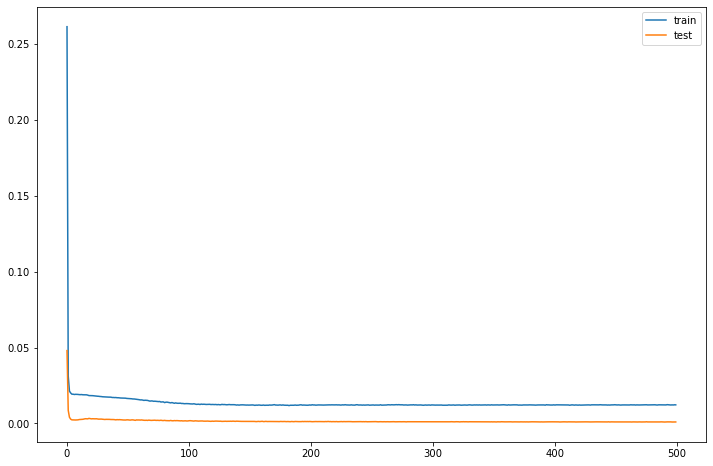

In [28]:
# plot history
pyplot.figure(figsize=(12, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
# make a prediction
yhat = my_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [30]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [31]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [32]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22.974


In [33]:
import numpy as np
prediksi=np.stack((inv_y,inv_yhat),axis=1)

In [34]:
prediksi

array([[ 16.       ,   5.973195 ],
       [  7.       ,   9.807964 ],
       [  3.       ,   3.28093  ],
       [ 22.       ,   2.0922081],
       [ 49.999996 ,   7.9652104],
       [ 53.       ,  28.20121  ],
       [ 24.999998 ,  17.588934 ],
       [ 47.       ,  10.5980215],
       [ 17.       ,  13.008937 ],
       [  0.       ,   7.740754 ],
       [  0.       ,   6.116396 ],
       [  9.       ,   8.76162  ],
       [  0.       ,   3.5575197],
       [ 24.       ,   4.661035 ],
       [ 41.       ,   6.058168 ],
       [ 16.       ,  21.512037 ],
       [ 46.       ,   8.174105 ],
       [ 70.       ,  20.275013 ],
       [ 24.999998 ,  30.895145 ],
       [  7.       ,  10.77558  ],
       [  5.       ,   2.2888062],
       [ 16.       ,   2.023748 ],
       [ 16.       ,   5.281796 ],
       [ 52.       ,  10.066144 ],
       [ 48.999996 ,  14.355305 ],
       [ 10.       ,  18.327297 ],
       [  7.       ,   3.1640787],
       [  0.       ,   3.1900833],
       [  0.       ,

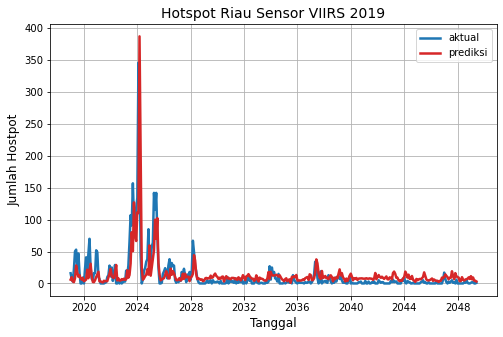

In [35]:
import pandas as pd
# generate urutan data sesuai panjang datanya
x = pd.date_range(start="2019-1-1", periods=len(inv_y), freq='MS')

# membuat frame
fig, ax = plt.subplots(figsize = (8,5))

# membuat time series plot
ax.plot(x, inv_y, color="tab:blue", label="aktual", linewidth=2.5)
ax.plot(x, inv_yhat, color="tab:red", label="prediksi", linewidth=2.5)

# membuat label-label
ax.set_title("Hotspot Riau Sensor VIIRS 2019", fontsize=14)
ax.set_xlabel("Tanggal", fontsize=12)
ax.set_ylabel("Jumlah Hostpot", fontsize=12)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()